In [1]:
import pandas as pd
# 파일 불러오기
data = pd.read_csv('KR_youtube_trending_data.csv', encoding='utf-8')
data.info()
# 행 82954개 열 16개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82954 entries, 0 to 82953
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           82954 non-null  object
 1   title              82954 non-null  object
 2   publishedAt        82954 non-null  object
 3   channelId          82954 non-null  object
 4   channelTitle       82954 non-null  object
 5   categoryId         82954 non-null  int64 
 6   trending_date      82954 non-null  object
 7   tags               82954 non-null  object
 8   view_count         82954 non-null  int64 
 9   likes              82954 non-null  int64 
 10  dislikes           82954 non-null  int64 
 11  comment_count      82954 non-null  int64 
 12  thumbnail_link     82954 non-null  object
 13  comments_disabled  82954 non-null  bool  
 14  ratings_disabled   82954 non-null  bool  
 15  description        81340 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Text(0, 0.5, 'views')

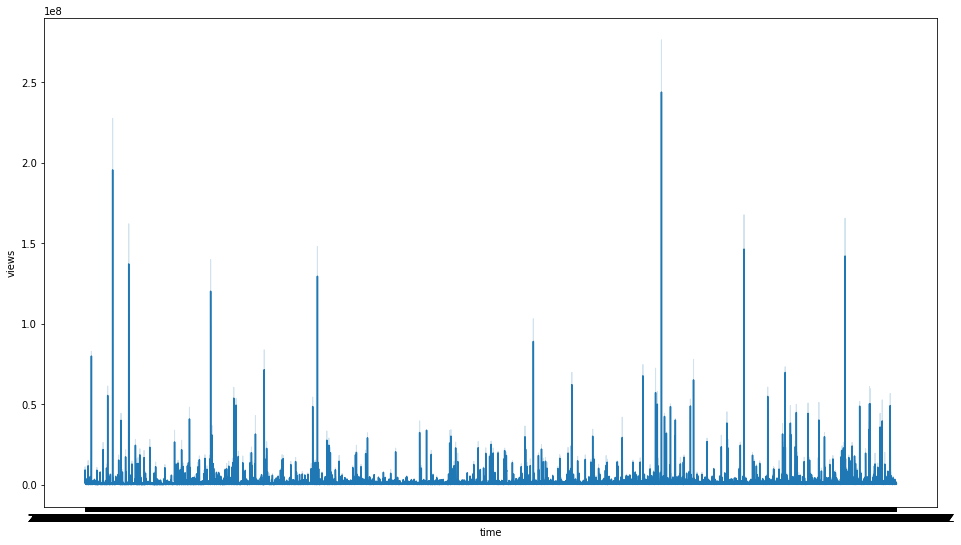

In [2]:
# publish 시간에 따른 조회수

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.lineplot(y=data['view_count'], x=data['publishedAt'])
plt.xlabel('time')
plt.ylabel('views')

In [3]:
# 최초 날짜
data.publishedAt.min()

'2020-08-05T02:00:03Z'

In [4]:
# 마지막 날짜
data.publishedAt.max()

'2021-10-09T03:00:13Z'

In [5]:
def summary_numeric(col):
    print(col)
    print("평균 {:>15}".format(format(data[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(data[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(data[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(data[col].max(), ",.2f")))
summary_numeric("view_count")

view_count
평균    1,614,833.03
최소            0.00
중앙      606,981.50
최대  296,314,174.00


In [6]:
# 게시된 시간에서 필요한 부분만 자르기
data.publishedAt = data.publishedAt.str[11:13]
data.publishedAt

0        09
1        09
2        09
3        15
4        09
         ..
82949    02
82950    11
82951    07
82952    14
82953    08
Name: publishedAt, Length: 82954, dtype: object

In [7]:
# 게시 시간 숫자로 만들기
data['publishedAt'] = pd.to_numeric(data['publishedAt'])

In [8]:
# 피어슨 상관계수 확인하기
corr = data.corr(method='pearson')
corr

,publishedAt,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
publishedAt,1.000000,0.002055,-0.022006,-0.026770,-0.016574,-0.030237,0.024377,-0.008781
categoryId,0.002055,1.000000,-0.131435,-0.161337,-0.078120,-0.092006,0.025637,-0.025331
view_count,-0.022006,-0.131435,1.000000,0.909959,0.693932,0.853154,0.029581,0.008992
likes,-0.026770,-0.161337,0.909959,1.000000,0.679463,0.839477,0.002146,-0.019056
dislikes,-0.016574,-0.078120,0.693932,0.679463,1.000000,0.650805,0.025284,-0.012388
comment_count,-0.030237,-0.092006,0.853154,0.839477,0.650805,1.000000,-0.005950,-0.005553
comments_disabled,0.024377,0.025637,0.029581,0.002146,0.025284,-0.005950,1.000000,0.065053
ratings_disabled,-0.008781,-0.025331,0.008992,-0.019056,-0.012388,-0.005553,0.065053,1.000000


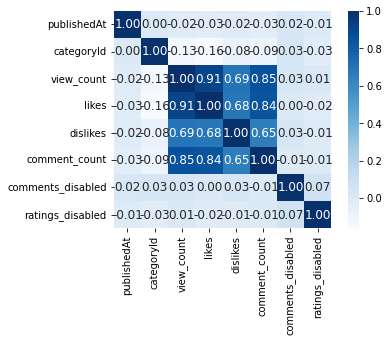

In [9]:
# 피어슨 상관계수를 활용해 heatmap 만들기
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 12}, fmt = '.2f', square = True, cmap = 'Blues')